In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']


class Obstacle:
    FLAT, ROCK, HILL, MOUNTAIN = range(4)

def load_image(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return image

def tile_image(image, tile_size):
    rows, cols = image.shape
    tile_rows = rows // tile_size
    tile_cols = cols // tile_size

    tiles = []
    for i in range(tile_rows):
        for j in range(tile_cols):
            tile = image[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size]
            tiles.append(tile)
    return tiles, tile_rows, tile_cols

def calculate_tile_statistics(tile):
    stddev_height = np.std(tile)
    mean_height = np.mean(tile)
    return stddev_height, mean_height

def classify_tile(stddev, mean, thresholds):
    if stddev < thresholds['rock_stddev'] and mean < thresholds['rock_mean']:
        return Obstacle.FLAT
    elif thresholds['rock_stddev'] <= stddev < thresholds['hill_stddev']:
        return Obstacle.ROCK
    elif thresholds['hill_stddev'] <= stddev < thresholds['mountain_stddev']:
        return Obstacle.HILL
    else:
        return Obstacle.MOUNTAIN

def create_colored_overlay(image, tile_size, thresholds):
    tiles, tile_rows, tile_cols = tile_image(image, tile_size)
    overlay = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    colormap = {
        Obstacle.FLAT: (0, 255, 0),
        Obstacle.ROCK: (255, 255, 0),
        Obstacle.HILL: (255, 0, 0),
        Obstacle.MOUNTAIN: (0, 0, 255)
    }

    for tile_idx, tile in enumerate(tiles):
        stddev, mean = calculate_tile_statistics(tile)
        tile_type = classify_tile(stddev, mean, thresholds)
        color = colormap[tile_type]
        
        row, col = divmod(tile_idx, tile_cols)
        overlay[row*tile_size:(row+1)*tile_size, col*tile_size:(col+1)*tile_size] = color
    
    return overlay

def main(file_path, tile_size, thresholds, a1=0.7, a2=0.4):
    image = load_image(file_path)
    overlay = create_colored_overlay(image, tile_size, thresholds)
    # Blend the original image and the overlay
    blended = cv2.addWeighted(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), a1, overlay, a2, 0)

    # Display the result with a legend
    plt.figure(figsize=(10, 10), facecolor='black') # Set the figure's face color to black
    plt.imshow(blended)
    plt.title(f"Obstacle Detection with Tile Size {tile_size}x{tile_size}", color='white', fontweight='bold')

    legend_labels = {
        'Flat': (0, 255, 0),
        'Rocks': (255, 255, 0),
        'Hills': (255, 0, 0),
        'Mountains': (0, 0, 255)
    }
    patches = [mpatches.Patch(color=np.array(color)/255, label=label) for label, color in legend_labels.items()]
    plt.legend(handles=patches, bbox_to_anchor=(1., 1), loc='upper left')

    plt.axis('off')
    plt.tight_layout(pad=2)  # This adjusts the padding around the plot area and between subplots
    plt.show()


thresholds = {
    'rock_stddev': 3,          # example values that classify tiles as rocks
    'rock_mean': 20,           # example mean height value
    'hill_stddev': 8,         # example values that classify tiles as hills
    'mountain_stddev': 15      # example values that classify tiles as mountains
}

def showframes_add(frames,ccmap= None,labels=[],label_font_size=8,nrows=0,ncols=0):
    """Sub function don't call it alone
    """

    plot_di = int(frames.shape[0]**0.5)

    if nrows ==0 or ncols ==0 :
        nrows, ncols = plot_di,plot_di 

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    
    if len(labels)!=0:
        plt.subplots_adjust(left=0.1,bottom=0.02,right=0.9,top=0.99,wspace=0.3,hspace=0.4) ### Fixes the postions of the plots to show labels
        for ind ,ax in enumerate( axes.flat):
            
            im = ax.imshow(frames[int(ind)],cmap =ccmap) #### Plots the frame
            ax.set_title(f"lab: {labels[ind]}", fontstyle='italic',fontsize =label_font_size , pad=2) #### Writes the labels
            
            ax.set_xticks([])#### Turn of Ticks
            ax.set_yticks([])#### Turn of Ticks
        
            
            
                
    else:
        plt.subplots_adjust(left=0.1,bottom=0.02,right=0.9,top=0.9,wspace=0.3,hspace=0.4)  ### Fixes the postions of the plots
        for ind ,ax in enumerate( axes.flat):

            im = ax.imshow(frames[int(ind)],cmap =ccmap) #### Plots the frame
            ax.set_title(f"{ind}", fontstyle='italic',fontsize = label_font_size, pad=2)  #### Writes the frame number
            ax.set_xticks([])#### Turn of Ticks
            ax.set_yticks([])#### Turn of Ticks
        
        

    
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    
    

    
#     fig.tight_layout(pad=3.0)
    
    
    
def showframes(frames,typee= None,fig_s = (10,10),labels: list =[],label_font_size: int =8,nrows=0,ncols=0):
     
    """good for dealing with many frames with different image types like RGB, BGR, GRAY... 
    with some types "cmaps":
    gist_gray = g
    jet = c
    tab20b = t
    viridis = v
    cividis = d
    BGR = bgr
    or leave it and will do defult

    labels are used to make titles for each image like the model prediction for this image takes a listlike 

    label_font_size takes int 

    """
    plt.rcParams['figure.figsize'] = fig_s
    figure(figsize=fig_s, dpi=100)
    
    
    if typee=="g":
        showframes_add(frames,ccmap ='gist_gray',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="c" :
        showframes_add(frames,ccmap ='jet',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="t" :
        showframes_add(frames,ccmap ='tab20b',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="v" :
        showframes_add(frames,ccmap ='viridis',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="d" :
        showframes_add(frames,ccmap ='cividis',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)

    elif typee=="RGB"or typee=='rgb':
        showframes_add(frames[:,:,:,[2,1,0]],ccmap ='cividis',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    else:
        showframes_add(frames,labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
        

    
    plt.show()
    

def index_to_position(index, tile_cols):
    """Convert a linear index to a 2D position (row, col)."""
    row = index // tile_cols
    col = index % tile_cols
    return row, col

def position_to_index(row, col, tile_cols):
    """Convert a 2D position (row, col) back to a linear index."""
    return row * tile_cols + col

def label_tiles(tiles, tile_rows, tile_cols):
    """Label tiles with their linear index based on their position."""
    labeled_tiles = []
    for index, tile in enumerate(tiles):
        row, col = index_to_position(index, tile_cols)
        label = f"tile_{row}_{col}"
        labeled_tiles.append(label)
    return labeled_tiles

def extract_position_from_label(label):
    """Extract the row and column number from a tile label."""
    # Assume label format is 'tile_row_column'
    parts = label.split('_')
    if len(parts) == 3 and parts[0] == 'tile':
        row, col = int(parts[1]), int(parts[2])
        return row, col
    else:
        raise ValueError("Label does not match the expected format 'tile_row_col'")


import os

def save_labeled_tiles(image, tile_size, thresholds, storage_path):
    os.makedirs(storage_path, exist_ok=True)  # Ensure base storage path exists

    # Labels for the folders
    labels = {
        Obstacle.FLAT: "Flat",
        Obstacle.ROCK: "Rock",
        Obstacle.HILL: "Hill",
        Obstacle.MOUNTAIN: "Mountain"
    }

    # Create labeled folders
    for label in labels.values():
        os.makedirs(os.path.join(storage_path, label), exist_ok=True)

    # Process and save the tiles
    tiles, tile_rows, tile_cols = tile_image(image, tile_size)
    for tile_idx, tile in enumerate(tiles):
        stddev, mean = calculate_tile_statistics(tile)
        tile_type = classify_tile(stddev, mean, thresholds)
        label = labels[tile_type]
        label_folder = os.path.join(storage_path, label)

        # Save the tile image to the respective folder
        tile_filename = f"tile_{tile_idx}.png"
        tile_path = os.path.join(label_folder, tile_filename)
        cv2.imwrite(tile_path, tile)

tile_size=200
# Example usage
# Define thresholds, etc.
storage_path = 'data/combiled'  # Replace with your actual storage path
image = load_image('data/JEZ_ctx_B_soc_008_DTM_MOLAtopography_DeltaGeoid_20m_Eqc_latTs0_lon0_.jpg')  # Load the main image from which to extract tiles
save_labeled_tiles(image, tile_size, thresholds, storage_path)

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']


class Obstacle:
    FLAT, ROCK, HILL, MOUNTAIN = range(4)

def load_image(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return image

def tile_image(image, tile_size):
    rows, cols = image.shape
    tile_rows = rows // tile_size
    tile_cols = cols // tile_size

    tiles = []
    for i in range(tile_rows):
        for j in range(tile_cols):
            tile = image[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size]
            tiles.append(tile)
    return tiles, tile_rows, tile_cols

def calculate_tile_statistics(tile):
    stddev_height = np.std(tile)
    mean_height = np.mean(tile)
    return stddev_height, mean_height

def classify_tile(stddev, mean, thresholds):
    if stddev < thresholds['rock_stddev'] and mean < thresholds['rock_mean']:
        return Obstacle.FLAT
    elif thresholds['rock_stddev'] <= stddev < thresholds['hill_stddev']:
        return Obstacle.ROCK
    elif thresholds['hill_stddev'] <= stddev < thresholds['mountain_stddev']:
        return Obstacle.HILL
    else:
        return Obstacle.MOUNTAIN

def create_colored_overlay(image, tile_size, thresholds):
    tiles, tile_rows, tile_cols = tile_image(image, tile_size)
    overlay = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    colormap = {
        Obstacle.FLAT: (0, 255, 0),
        Obstacle.ROCK: (255, 255, 0),
        Obstacle.HILL: (255, 0, 0),
        Obstacle.MOUNTAIN: (0, 0, 255)
    }

    for tile_idx, tile in enumerate(tiles):
        stddev, mean = calculate_tile_statistics(tile)
        tile_type = classify_tile(stddev, mean, thresholds)
        color = colormap[tile_type]
        
        row, col = divmod(tile_idx, tile_cols)
        overlay[row*tile_size:(row+1)*tile_size, col*tile_size:(col+1)*tile_size] = color
    
    return overlay

def main(file_path, tile_size, thresholds, a1=0.7, a2=0.4):
    image = load_image(file_path)
    overlay = create_colored_overlay(image, tile_size, thresholds)
    # Blend the original image and the overlay
    blended = cv2.addWeighted(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), a1, overlay, a2, 0)

    # Display the result with a legend
    plt.figure(figsize=(10, 10), facecolor='black') # Set the figure's face color to black
    plt.imshow(blended)
    plt.title(f"Obstacle Detection with Tile Size {tile_size}x{tile_size}", color='white', fontweight='bold')

    legend_labels = {
        'Flat': (0, 255, 0),
        'Rocks': (255, 255, 0),
        'Hills': (255, 0, 0),
        'Mountains': (0, 0, 255)
    }
    patches = [mpatches.Patch(color=np.array(color)/255, label=label) for label, color in legend_labels.items()]
    plt.legend(handles=patches, bbox_to_anchor=(1., 1), loc='upper left')

    plt.axis('off')
    plt.tight_layout(pad=2)  # This adjusts the padding around the plot area and between subplots
    plt.show()


thresholds = {
    'rock_stddev': 3,          # example values that classify tiles as rocks
    'rock_mean': 20,           # example mean height value
    'hill_stddev': 8,         # example values that classify tiles as hills
    'mountain_stddev': 15      # example values that classify tiles as mountains
}

def showframes_add(frames,ccmap= None,labels=[],label_font_size=8,nrows=0,ncols=0):
    """Sub function don't call it alone
    """

    plot_di = int(frames.shape[0]**0.5)

    if nrows ==0 or ncols ==0 :
        nrows, ncols = plot_di,plot_di 

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    
    if len(labels)!=0:
        plt.subplots_adjust(left=0.1,bottom=0.02,right=0.9,top=0.99,wspace=0.3,hspace=0.4) ### Fixes the postions of the plots to show labels
        for ind ,ax in enumerate( axes.flat):
            
            im = ax.imshow(frames[int(ind)],cmap =ccmap) #### Plots the frame
            ax.set_title(f"lab: {labels[ind]}", fontstyle='italic',fontsize =label_font_size , pad=2) #### Writes the labels
            
            ax.set_xticks([])#### Turn of Ticks
            ax.set_yticks([])#### Turn of Ticks
        
            
            
                
    else:
        plt.subplots_adjust(left=0.1,bottom=0.02,right=0.9,top=0.9,wspace=0.3,hspace=0.4)  ### Fixes the postions of the plots
        for ind ,ax in enumerate( axes.flat):

            im = ax.imshow(frames[int(ind)],cmap =ccmap) #### Plots the frame
            ax.set_title(f"{ind}", fontstyle='italic',fontsize = label_font_size, pad=2)  #### Writes the frame number
            ax.set_xticks([])#### Turn of Ticks
            ax.set_yticks([])#### Turn of Ticks
        
        

    
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    
    

    
#     fig.tight_layout(pad=3.0)
    
    
    
def showframes(frames,typee= None,fig_s = (10,10),labels: list =[],label_font_size: int =8,nrows=0,ncols=0):
     
    """good for dealing with many frames with different image types like RGB, BGR, GRAY... 
    with some types "cmaps":
    gist_gray = g
    jet = c
    tab20b = t
    viridis = v
    cividis = d
    BGR = bgr
    or leave it and will do defult

    labels are used to make titles for each image like the model prediction for this image takes a listlike 

    label_font_size takes int 

    """
    plt.rcParams['figure.figsize'] = fig_s
    figure(figsize=fig_s, dpi=100)
    
    
    if typee=="g":
        showframes_add(frames,ccmap ='gist_gray',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="c" :
        showframes_add(frames,ccmap ='jet',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="t" :
        showframes_add(frames,ccmap ='tab20b',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="v" :
        showframes_add(frames,ccmap ='viridis',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="d" :
        showframes_add(frames,ccmap ='cividis',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)

    elif typee=="RGB"or typee=='rgb':
        showframes_add(frames[:,:,:,[2,1,0]],ccmap ='cividis',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    else:
        showframes_add(frames,labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
        

    
    plt.show()
    

def index_to_position(index, tile_cols):
    """Convert a linear index to a 2D position (row, col)."""
    row = index // tile_cols
    col = index % tile_cols
    return row, col

def position_to_index(row, col, tile_cols):
    """Convert a 2D position (row, col) back to a linear index."""
    return row * tile_cols + col

def label_tiles(tiles, tile_rows, tile_cols):
    """Label tiles with their linear index based on their position."""
    labeled_tiles = []
    for index, tile in enumerate(tiles):
        row, col = index_to_position(index, tile_cols)
        label = f"tile_{row}_{col}"
        labeled_tiles.append(label)
    return labeled_tiles

def extract_position_from_label(label):
    """Extract the row and column number from a tile label."""
    # Assume label format is 'tile_row_column'
    parts = label.split('_')
    if len(parts) == 3 and parts[0] == 'tile':
        row, col = int(parts[1]), int(parts[2])
        return row, col
    else:
        raise ValueError("Label does not match the expected format 'tile_row_col'")


import os

def save_labeled_tiles(image, tile_size, thresholds, storage_path):
    os.makedirs(storage_path, exist_ok=True)  # Ensure base storage path exists

    # Labels for the folders
    labels = {
        Obstacle.FLAT: "Flat",
        Obstacle.ROCK: "Rock",
        Obstacle.HILL: "Hill",
        Obstacle.MOUNTAIN: "Mountain"
    }

    # Create labeled folders
    for label in labels.values():
        os.makedirs(os.path.join(storage_path, label), exist_ok=True)

    # Process and save the tiles
    tiles, tile_rows, tile_cols = tile_image(image, tile_size)
    for tile_idx, tile in enumerate(tiles):
        stddev, mean = calculate_tile_statistics(tile)
        tile_type = classify_tile(stddev, mean, thresholds)
        label = labels[tile_type]
        label_folder = os.path.join(storage_path, label)

        # Save the tile image to the respective folder
        tile_filename = f"tile_{tile_idx}.png"
        tile_path = os.path.join(label_folder, tile_filename)
        cv2.imwrite(tile_path, tile)

tile_size=200
# Example usage
# Define thresholds, etc.
storage_path = 'data/combiled'  # Replace with your actual storage path
image = load_image('data/JEZ_ctx_B_soc_008_DTM_MOLAtopography_DeltaGeoid_20m_Eqc_latTs0_lon0_.jpg')  # Load the main image from which to extract tiles
save_labeled_tiles(image, tile_size, thresholds, storage_path)
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
import cv2
import os


tile_size =50 
image = load_image('data/JEZ_ctx_B_soc_008_DTM_MOLAtopography_DeltaGeoid_20m_Eqc_latTs0_lon0_.jpg')  

labels=label_tiles(*tile_image(image,tile_size))

pos_s = [extract_position_from_label(l) for l in labels]
print(pos_s[:5])
y = [position_to_index(*pos,tile_image(image,tile_size)[2]) for pos in pos_s]


data = np.array(tile_image(image,tile_size)[0])

labels=label_tiles(*tile_image(image,tile_size))
# showframes(data[:5],labels=y[:5],label_font_size=16)
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class Augmentor:
    def __init__(self, rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, 
                 shear_range=0.2, zoom_range=0.2, horizontal_flip=True, noise_range=0.01):
        self.rotation_range = rotation_range
        self.width_shift_range = width_shift_range
        self.height_shift_range = height_shift_range
        self.shear_range = shear_range
        self.zoom_range = zoom_range
        self.horizontal_flip = horizontal_flip
        self.noise_range = noise_range

        # Initialize ImageDataGenerator with the passed parameters
        self.datagen = ImageDataGenerator(
            rotation_range=self.rotation_range,
            width_shift_range=self.width_shift_range,
            height_shift_range=self.height_shift_range,
            shear_range=self.shear_range,
            zoom_range=self.zoom_range,
            horizontal_flip=self.horizontal_flip,
            preprocessing_function=self.add_noise
        )

    def add_noise(self, image):
        """Apply random noise to an image."""
        variance = np.random.uniform(0, self.noise_range) * (np.max(image) - np.min(image))
        noise = np.random.normal(0, variance, image.shape)
        noisy_image = image + noise
        noisy_image = np.clip(noisy_image, 0, 255)
        return noisy_image.astype(image.dtype)

    def flow(self, x, y, batch_size=32):
        """Generate batches of augmented data."""
        return self.datagen.flow(x, y, batch_size=batch_size)



# Assuming the Augmentor class is already defined as before
augmentor = Augmentor(rotation_range=350, width_shift_range=0.15, noise_range=0.04)

# Example dataset (replace data and y with your actual data)
# data = np.array([...])  # Your image data
# y = np.array([...])  # Your labels

# Factor to determine the number of augmented images per original image
augment_factor = 1  # Change this number based on how many augmented images you want per original image

# Lists to store augmented images and labels
augmented_images = []

augmented_labels = []


# This 'for' loop will generate 'augment_factor' augmented images for each original image
for i in range(len(data)):
    # Get a single image and label
    image = data[i]
    label = y[i]

    # Expand the image dimensions if necessary (add the channels dimension)
    if image.ndim == 2: # for grayscale images
        image = np.expand_dims(image, axis=-1)
    
    # Augment the image 'augment_factor' times
    for _ in range(augment_factor):
        # Use the 'flow' function from the Augmentor, which expects a batch
        # Ensure the image has four dimensions (batch_size, height, width, channels)
        image_batch, label_batch = next(
            augmentor.flow(
                np.expand_dims(image, 0), # add the batch dimension
                np.expand_dims(label, 0), # add the batch dimension for the labels if necessary
                batch_size=1
            )
        )
        # Remove the batch dimension since we are processing one image at a time
        augmented_image = np.squeeze(image_batch, axis=0)
        augmented_label = np.squeeze(label_batch, axis=0)
        
        # Append the augmented images and labels
        augmented_images.append(augmented_image)
        augmented_labels.append(augmented_label)

# ...

# Convert the lists to Numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# 'augmented_images' and 'augmented_labels' now contain the augmented dataset
# showframes(augmented_images[:5],labels=augmented_labels[:5])

train_data, test_data, train_labels, test_labels = train_test_split(
        augmented_images, augmented_labels, test_size=0.25, random_state=42,shuffle=True)
test_labels.shape

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]


(380,)

In [18]:
import tensorflow as tf
import pydot



In [19]:
model_path = 'model\saved_model_acc_71.h5'

best_model = tf.keras.models.load_model(model_path)

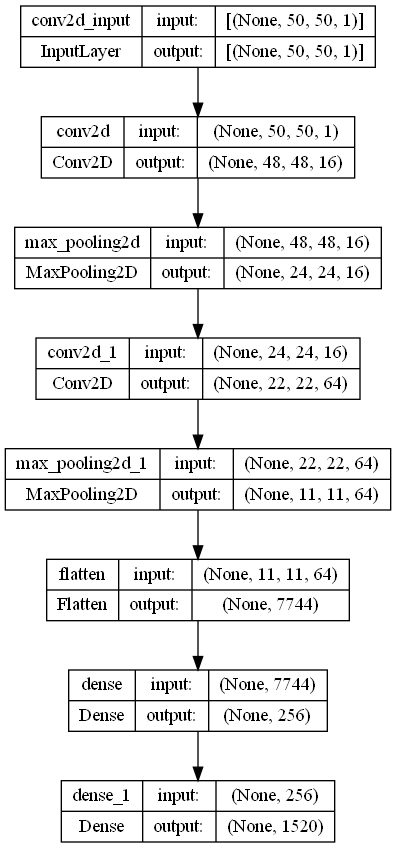

In [13]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model


# Plot the model architecture
plot_model(best_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 256)               1

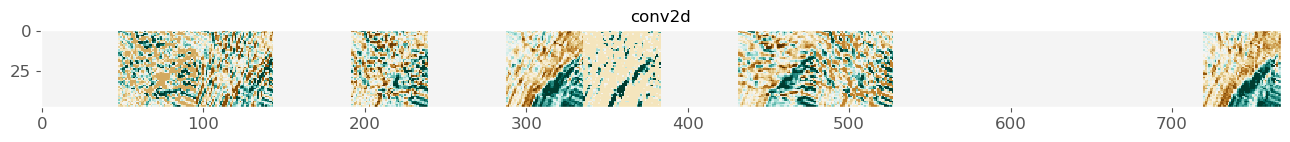

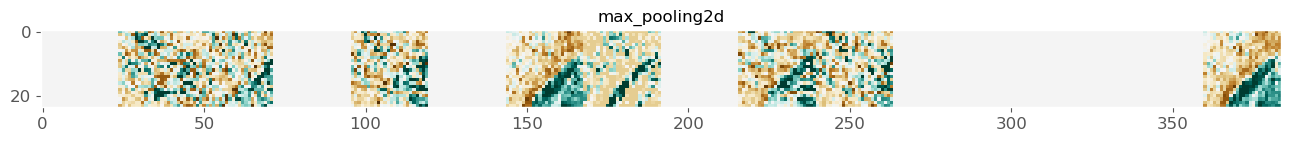

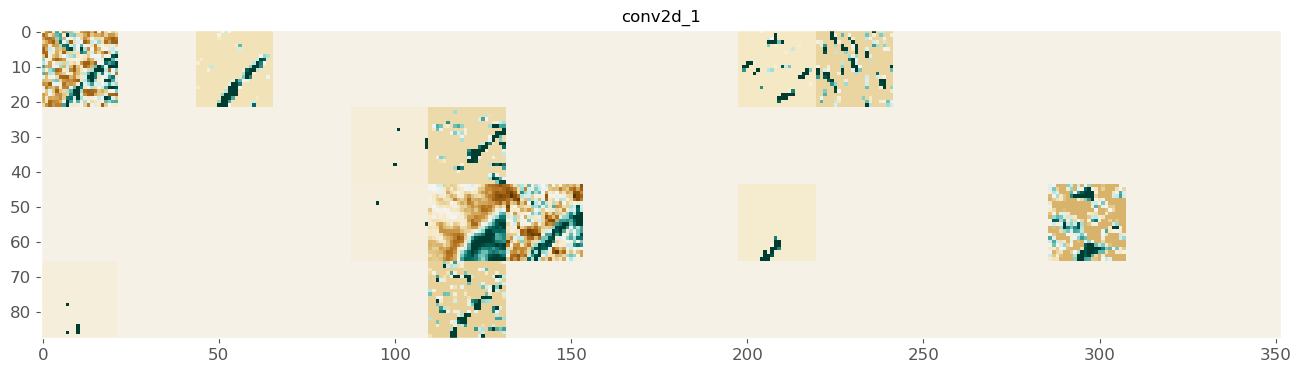

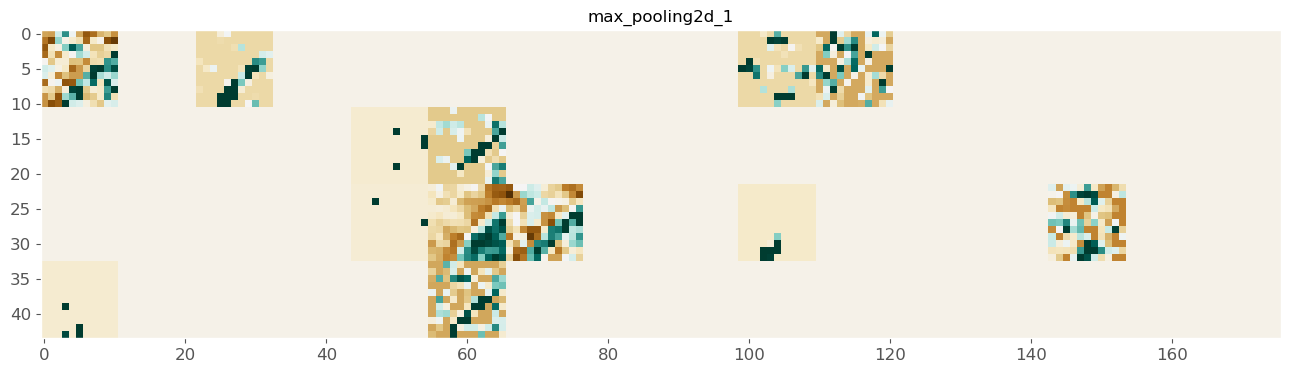

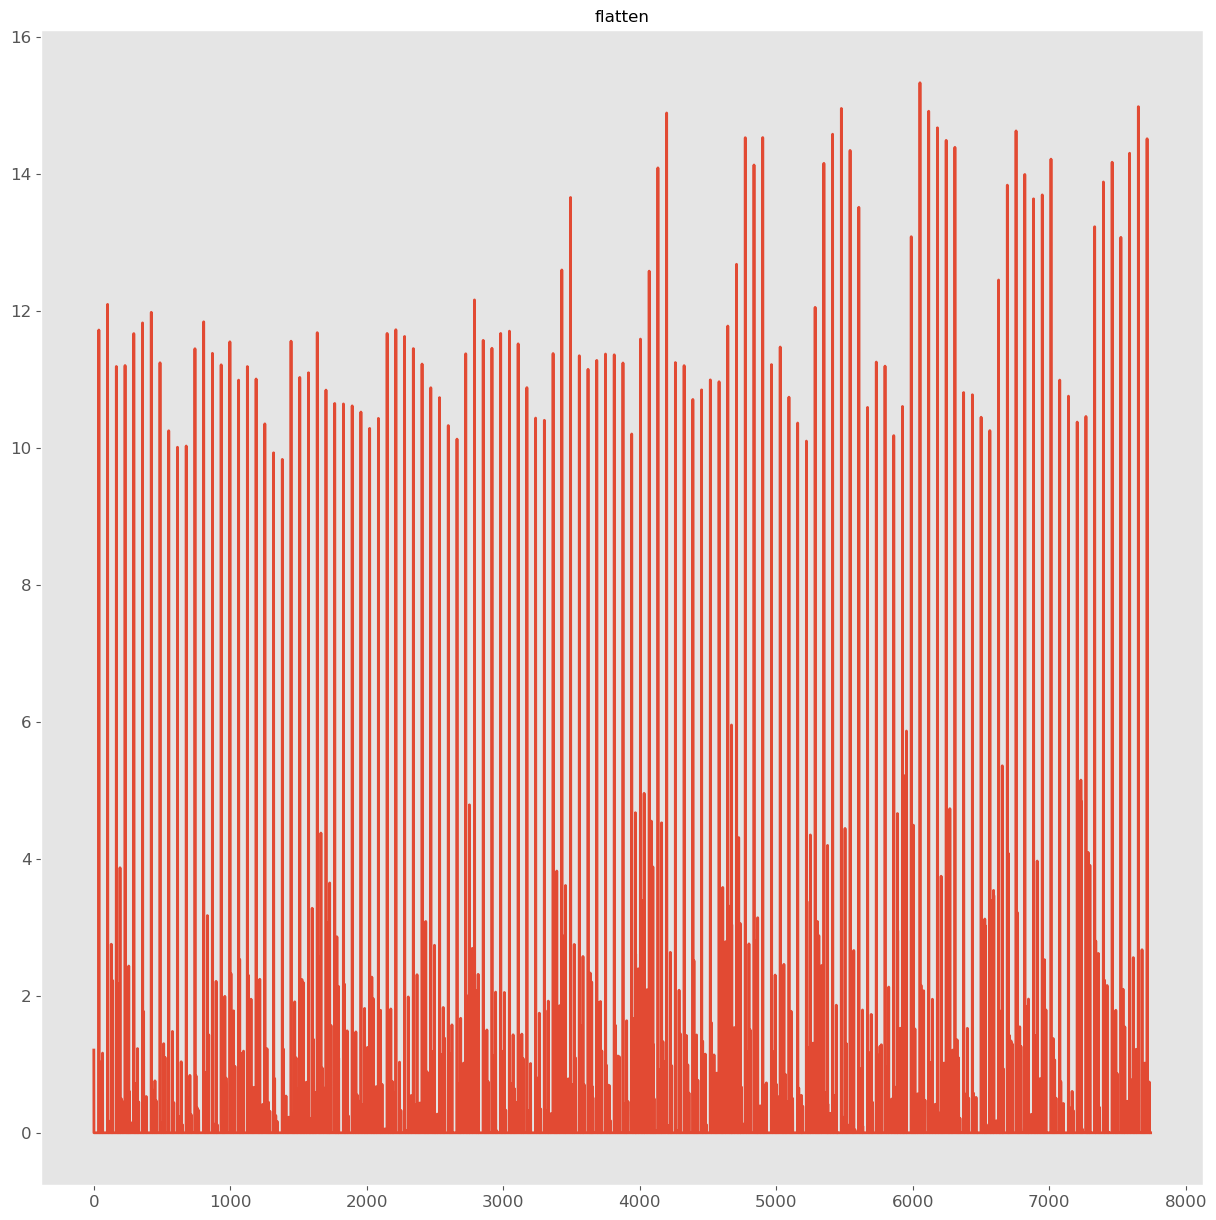

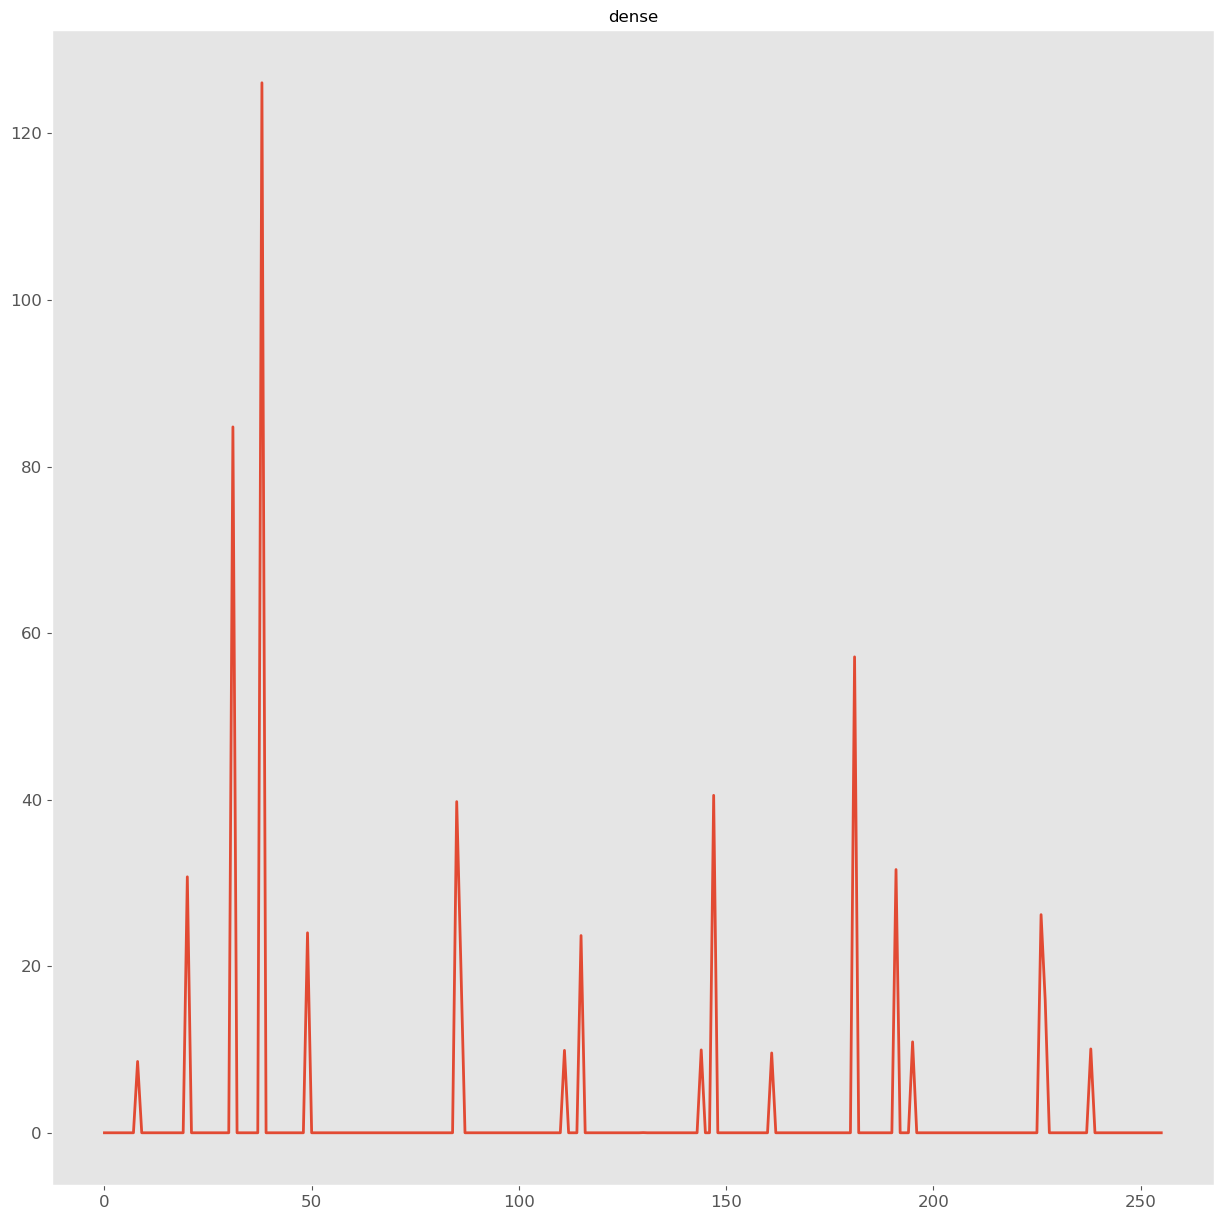

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Print the model summary
model  = best_model
model.summary()



# Print the shape of the data
print(f"x_train shape: {train_data.shape}")
print(f"x_test shape: {test_data.shape}")

# Create a model to output intermediate layers
layer_outputs = [layer.output for layer in model.layers[:6]]  # Extract outputs of the first 6 layers
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Get a sample input image
sample_image = test_data[0].reshape(1, 50, 50, 1)

# Get the activations
activations = activation_model.predict(sample_image)

# Define a function to plot the activations
def plot_activations(activations, layer_names):
    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations):
        print(f"Layer: {layer_name}, Activation shape: {layer_activation.shape}")  # Debug statement
        if len(layer_activation.shape) == 4:
            n_features = layer_activation.shape[-1]  # Number of features in the feature map
            size = layer_activation.shape[1]  # The feature map shape (height, width)

            n_cols = n_features // images_per_row  # Tiles the activation channels in this matrix
            display_grid = np.zeros((size * n_cols, images_per_row * size))

            for col in range(n_cols):
                for row in range(images_per_row):
                    channel_image = layer_activation[0, :, :, col * images_per_row + row]
                    channel_image -= channel_image.mean()
                    if channel_image.std() > 0:
                        channel_image /= channel_image.std()
                    channel_image *= 64
                    channel_image += 128
                    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                    display_grid[col * size: (col + 1) * size,
                                 row * size: (row + 1) * size] = channel_image

            scale = 1. / size
            plt.figure(figsize=(scale * display_grid.shape[1],
                                scale * display_grid.shape[0]))
            plt.title(layer_name)
            plt.grid(False)
            
            plt.imshow(display_grid, aspect='auto', cmap='BrBG')
            plt.savefig(f'model\model visual\{layer_name}_')
        elif len(layer_activation.shape) == 2:
            # This handles the case for dense layers or flat layers
            plt.figure(figsize=(15, 15))
            plt.title(layer_name)
            plt.plot(layer_activation[0])
            
            plt.grid(False)

# Get the layer names
layer_names = [layer.name for layer in model.layers[:6]]

# Plot the activations
plot_activations(activations, layer_names)
plt.show()
